# Actividad Evaluable: Exploración de Datos: Análisis Estadístico - Mapas de calor y boxplots

Recopilación de Datos Iniciales

In [24]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd  
from sklearn.cluster import KMeans
import seaborn as sns 
diabetes=pd.read_csv("diabetes.csv")

Descripción de los datos:

In [4]:
dim=diabetes.shape
print("Son "+str(dim[0])+" Filas\n"+"Son: "+str(dim[1])+" Columnas")

Son 768 Filas
Son: 9 Columnas


Hay 9 variables de los cuales cada uno cuenta con 768 datos dentro.

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
print("Pregnancies: Es de tipo cuantitativo discreto")
print("Glucose: Es de tipo cuantitativo discreto")
print("BloodPresssure: Es de tipo cuantitativo discreto")
print("SkinThickness: Es de tipo cuantitativo discreto")
print("Insulin: Es de tipo cuantitativo discreto")
print("BMI: Es de tipo cuantitativo continuo")
print("DPF: Es de tipo cuantitativo continuo")
print("Age: Es de tipo cuantitativo discreto")
print("Age: Es de tipo cualitativo nominal")

Pregnancies: Es de tipo cuantitativo discreto
Glucose: Es de tipo cuantitativo discreto
BloodPresssure: Es de tipo cuantitativo discreto
SkinThickness: Es de tipo cuantitativo discreto
Insulin: Es de tipo cuantitativo discreto
BMI: Es de tipo cuantitativo continuo
DPF: Es de tipo cuantitativo continuo
Age: Es de tipo cuantitativo discreto
Age: Es de tipo cualitativo nominal


    Pregnancies: Numero de veces embarazada.
    Glucose: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia a la glucosa oral.
    BloodPressure: Presión arterial diastólica (mm Hg).
    SkinThickness: Espesor del pliegue cutáneo del tríceps (mm).
    Insulin: 2-Hour serum inbsulin (mu U/ml).
    BMI: Indice de masa corporal (kg/m^2).
    DPF: 
    Age: Edad del paciente.
    Outcome: Variable de valores entre 0 y 1.

In [7]:
colm=diabetes.columns.values
for i in colm:
    print(i,":")
    print("-"*20)
    print(diabetes[i].dtypes)
    print("Máximo en:",diabetes[i].max())
    print("Minimo en:",diabetes[i].min())
    print("-"*20)

Pregnancies :
--------------------
int64
Máximo en: 17
Minimo en: 0
--------------------
Glucose :
--------------------
int64
Máximo en: 199
Minimo en: 0
--------------------
BloodPressure :
--------------------
int64
Máximo en: 122
Minimo en: 0
--------------------
SkinThickness :
--------------------
int64
Máximo en: 99
Minimo en: 0
--------------------
Insulin :
--------------------
int64
Máximo en: 846
Minimo en: 0
--------------------
BMI :
--------------------
float64
Máximo en: 67.1
Minimo en: 0.0
--------------------
DiabetesPedigreeFunction :
--------------------
float64
Máximo en: 2.42
Minimo en: 0.078
--------------------
Age :
--------------------
int64
Máximo en: 81
Minimo en: 21
--------------------
Outcome :
--------------------
int64
Máximo en: 1
Minimo en: 0
--------------------


In [8]:
cantdia=0
for i in range(0,len(diabetes[colm[-1]])):
    if diabetes[colm[-1]][i]==1:
        cantdia+=1
print ("Personas con diabetes:",cantdia)
print ("Personas sin diabetes:",(len(diabetes[colm[-1]])-cantdia))

Personas con diabetes: 268
Personas sin diabetes: 500


Exploración de datos (Media, mediana)

In [9]:
colm=diabetes.columns.values
for i in colm:
    if i!=colm[-1]: #Caso particular: col. final. No categorica
        print(i,":")
        print("-"*40)
        print("Media:",diabetes[i].mean())
        print("Mediana:",diabetes[i].median())
        print("Desviación Estandar:",diabetes[i].std())
        print("-"*40)

Pregnancies :
----------------------------------------
Media: 3.8450520833333335
Mediana: 3.0
Desviación Estandar: 3.3695780626988623
----------------------------------------
Glucose :
----------------------------------------
Media: 120.89453125
Mediana: 117.0
Desviación Estandar: 31.97261819513622
----------------------------------------
BloodPressure :
----------------------------------------
Media: 69.10546875
Mediana: 72.0
Desviación Estandar: 19.355807170644777
----------------------------------------
SkinThickness :
----------------------------------------
Media: 20.536458333333332
Mediana: 23.0
Desviación Estandar: 15.952217567727677
----------------------------------------
Insulin :
----------------------------------------
Media: 79.79947916666667
Mediana: 30.5
Desviación Estandar: 115.24400235133837
----------------------------------------
BMI :
----------------------------------------
Media: 31.992578124999977
Mediana: 32.0
Desviación Estandar: 7.8841603203754405
------------

Visualización de datos:

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

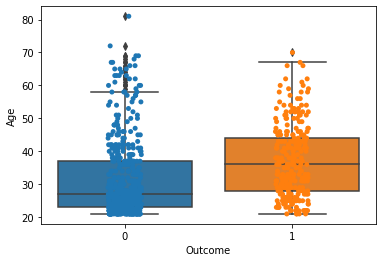

In [13]:
sns.boxplot(x="Outcome", y="Age", data=diabetes)
sns.stripplot(x="Outcome", y="Age",data=diabetes, jitter=True,
                edgecolor="gray")

Encontramos que la edad para las personas sin diabetes y con diabetes no difere mucho sin embargo se encuentra mucho mayor dispersión o valores fuera de rango en el caso de los que no tienen diabetes

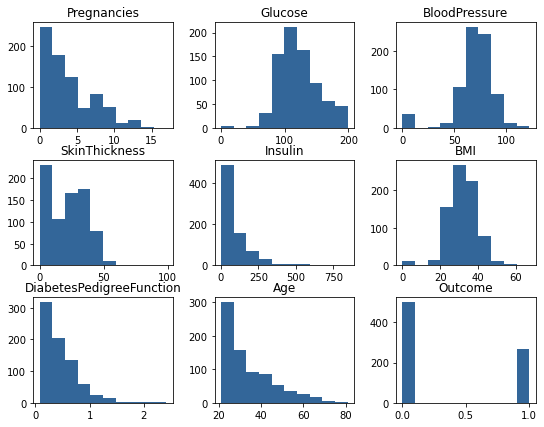

In [14]:
diabetes.hist(bins=10,figsize=(9,7),grid=False, color=['#336699']);

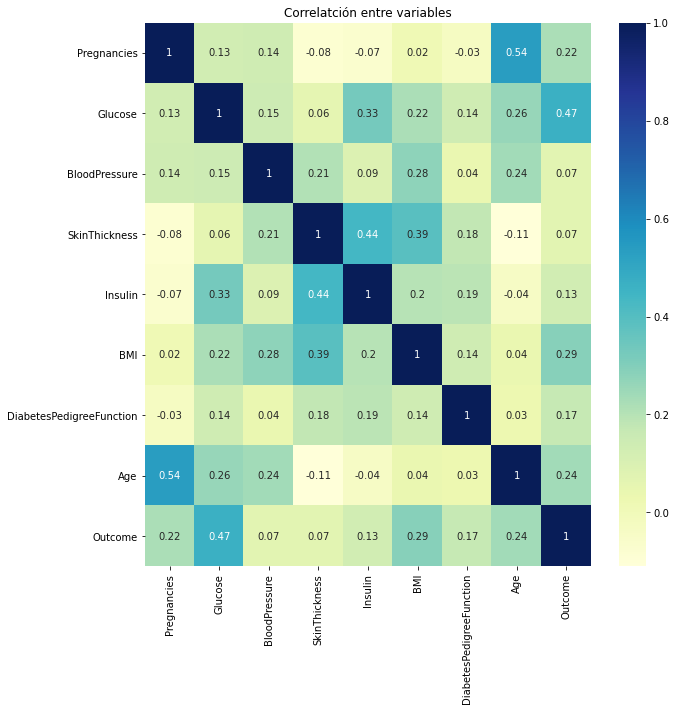

In [19]:
corr_mat=diabetes.corr().round(2)
plt.figure(figsize=(10, 10))
sns.heatmap(data=corr_mat, annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlatción entre variables');

De acuerdo con NIH, Existen diversos factores para la terminación de la diabetes, en estos se detallan la insulina, el BMI, los antecedentes familiares (DPF), la edad, presión arterial, la glucosa y si es que esta persona dio a luz a un bebé que pesó mas de 9 libras, también otro estudio encontró que existe cierta relación entre el espesor de la piel en personas con diabetes, mostrando que este es mayor.

#### ¿Hay alguna variable que no aporta información?
De acuerdo con el mapa de calor, se encuentra una baja relación entre si la persona es diabética (Outcome) con respecto a la presión sanguínea y el espesor de la piel por lo que, se puede determinar que no tienen impacto, o menor impacto.

#### Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
Eliminaría la presión sanguinea y el espesor de piel ya que estos valores no generan un gran impacto en la determinación de diabetes de una persona.

#### ¿Existen variables que tengan datos extraños?
Existen valores nulos para BMI y otras demás variables, lo cual es muy extraño puesto que no puede existir valores nulos para este tipo de dato, probablemente sea un error o en caso contrario no se registró ese dato de la persona.

#### Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?
no, los rangos son diferentes para la mayoría de las variables y aunque estos valores tengan el mismo rango, no considero que exista un problema ya que cada variable cuenta con un peso ponderado en la determinación de la diabetes.

#### ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?
Que se parezcan como tal no, pero la edad parece tener una gran relación con la cantidad de embarazos, con una correlación de 0.54.

Referencias:
    https://www.niddk.nih.gov/health-information/informacion-de-la-salud/diabetes/informacion-general/factores-riesgo-tipo-2
    
    https://www.hormone.org/pacientes-y-cuidadores/la-diabetes-e-insulina#:~:text=La%20insulina%20es%20una%20hormona,llamado%20resistencia%20a%20la%20insulina).
    https://medlineplus.gov/spanish/ency/article/001214.htm#:~:text=Se%20diagnostica%20diabetes%20si%20el,para%20la%20diabetes%20tipo%202.
    
    http://www.enfermeriaaps.com/portal/?wpfb_dl=4256
    
    https://www.kaggle.com/uciml/pima-indians-diabetes-database/activity

#  Eliminación de variables no relevantes

In [46]:
diabetes_mod = diabetes.drop(['BloodPressure','SkinThickness', 'Outcome'], axis=1)
diabetes_mod.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


Se creó un nuevo documento de diabetes para el cual se eliminaron las columnas de "SkinThickness", "BlooodPressure" y "Outcome" ya que, para el caso de las dos primeras variables, la relación que existe con la variable que determina a una persona con diabetes era bajo, de 0.7 específicamente; para el caso de "Outcome" este se eliminó ya que se busca generar un aprendizaje no supervisado y para ello no podemos contar con una etiqueta como la de la columna "Outcome"

# Correción de Variables nulas

In [29]:
diabetes_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   Insulin                   768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 36.1 KB


No existen variables nulas en ninguna variable

In [43]:
diabetes_mod.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,<bound method Series.median of 0 0\n1 ...,33.6,0.627,50
1,1,85,<bound method Series.median of 0 0\n1 ...,26.6,0.351,31
2,8,183,<bound method Series.median of 0 0\n1 ...,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [49]:
from sklearn.metrics.pairwise import euclidean_distances
# Llamar al modelo KMeans, especificando número de clusters: 3 y hacer ajuste a los datos usando la función fit. 
# El modelo que ya aprendió se guarda en la variable kmeans.
kmeans=KMeans(n_clusters=2, random_state=0).fit(diabetes_mod)
# Mostrar los centroides obtenidos por el modelo generado con la librería sklearn
print(kmeans.cluster_centers_)
# Mostrar las etiquetas asignadas a los datos
print(kmeans.labels_)
euclidean_distances(kmeans.cluster_centers_)

[[  3.89768977 115.3960396   32.75412541  31.21930693   0.43894884
   33.12541254]
 [  3.64814815 141.46296296 255.78395062  34.88518519   0.59504938
   33.67283951]]
[0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0
 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0

array([[  0.        , 224.57874432],
       [224.57874432,   0.        ]])

In [ ]:

Dibujar en el plano cartesiano los puntos y los centroides obtenidos por el modelo generado con la librería sklearn 

plt.scatter(arreglo[:, 0], arreglo[:, -1])  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Puntos y Centroides')
plt.show()

# Preguntas

¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
Si, ya que cada una de las características de los pacientes llevan a dos únicos resultados, cuentan o no con diabetes por lo que estos centros agrupandose en la zona de mayores conccentraciones representarán los datos.
¿Cómo obtuviste el valor de k a usar?
El valor de k son las etiquetas a utilizar, para este caso se necesitan determinar si la persona tiene diabetes o no
¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?

¿Qué distancia tienen los centros entre sí? ¿Hay alguno que este muy cercano a otros?
se obtuvo una distancia de 224.57
¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
Existiría mayor dispersión por lo que representaría un problema al analizar los datos.

¿Qué puedes decir de los datos basándose en los centros?
Los datos que se entuentren en [  3.64814815 141.46296296 255.78395062  34.88518519   0.59504938 33.67283951] tendrán mayores problabilidades de contar con diabetes mientras que las demás personas ubicadas en los demás puntos tendrán mayor probabilidad de encontrarse fuera de estos.